In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

In [4]:
# データセット読み込み
dataset = pd.read_csv('tictactoe.csv')

dataset

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,result
0,-1,-1,-1,-1,1,1,0,1,1,-1
1,-1,-1,-1,-1,1,1,1,0,1,-1
2,-1,-1,-1,-1,1,1,1,1,0,-1
3,-1,-1,-1,0,0,1,0,1,1,-1
4,-1,-1,-1,0,0,1,1,0,1,-1
...,...,...,...,...,...,...,...,...,...,...
5885,1,1,1,1,-1,0,-1,0,-1,1
5886,1,1,1,1,-1,0,0,-1,-1,1
5887,1,1,1,1,0,-1,-1,-1,0,1
5888,1,1,1,1,0,-1,-1,0,-1,1


In [25]:
# データを説明変数と目的変数に分割
x = dataset.iloc[:, 0:9].values
y = dataset.iloc[:, 9].values

print(x.shape)
print(y.shape)

(5890, 9)
(5890,)


In [26]:
# ラベルをone-hot-encoding形式に変換
y = y + 1   # ラベルを(-1 ~ 1)→(0 ~ 2)に変更
y = to_categorical(y)

y.shape

(5890, 3)

In [28]:
# 学習データとテストデータに分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4123, 9)
(4123, 3)
(1767, 9)
(1767, 3)


In [29]:
# モデルを作成
def create_model():
    return Sequential([
        Dense(units=32, activation='relu', input_shape=(9, )),
        Dense(units=32, activation='relu'),
        Dense(units=3, activation='softmax')
    ])

In [30]:
# 学習条件を設定
model = create_model()
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.01), 
              metrics=['accuracy'])

In [31]:
# 学習
history = model.fit(x_train, y_train, epochs=256, batch_size=1024, verbose=0)

In [32]:
# モデル評価
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.94


<AxesSubplot:>

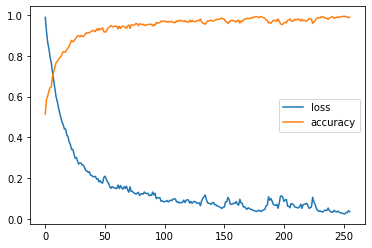

In [37]:
# 学習経過を可視化
pd.DataFrame(history.history).plot()

In [38]:
x_pred = np.empty(0)
for i in range(9):
    x_p = np.zeros(9).astype('int64')
    x_p[i] = -1
    x_pred = np.append(x_pred, x_p)
    
x_pred = x_pred.astype('int64')
x_pred = x_pred.reshape(9, 9)

x_pred

array([[-1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, -1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, -1]])

In [39]:
pred = model.predict(x_pred)

In [40]:
print('best x win = ', np.argmax([p[0] for p in pred]))
print('best o lose= ', np.argmin([p[2] for p in pred]))

best x win =  3
best o lose=  4


In [43]:
pred

array([[2.09610521e-15, 3.51992785e-05, 9.99964833e-01],
       [3.83165292e-22, 9.03900244e-09, 1.00000000e+00],
       [2.23729712e-19, 6.44134445e-07, 9.99999404e-01],
       [1.26491724e-14, 2.48604083e-05, 9.99975085e-01],
       [8.33433943e-19, 3.67807545e-04, 9.99632120e-01],
       [3.82723131e-19, 3.20468445e-07, 9.99999642e-01],
       [2.08151779e-22, 3.87959470e-10, 1.00000000e+00],
       [4.29304870e-22, 2.78875802e-08, 1.00000000e+00],
       [4.82290634e-18, 1.28832880e-06, 9.99998689e-01]], dtype=float32)

In [44]:
# モデルを保存
model.save('model.h5')

In [48]:
loaded_model = load_model('model.h5')

In [49]:
pred = loaded_model.predict(x_pred)
np.argmax([p[0] for p in pred])

3